## Independent Lab

Lewis Hughes 

I belong to a team assigned to assess the condition of the healthcare system in California. You currently work in the Information Systems department for a consulting firm working with the state government agency that oversees the healthcare system in California. Here, I will build classification trees as well as regression trees.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

Loading the Dataset

In [3]:
hospital_df = pd.read_csv("data/calihospital.txt", sep="\t")
display(hospital_df.head())

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


In [4]:
#Processing

hospital_df = hospital_df.dropna(subset=['OperInc', 'OperRev', 'TypeControl', 'DonorType'])

In [5]:
#Encoding Cateforical Variables

label_encoder = LabelEncoder()
hospital_df['TypeControl_encoded'] = label_encoder.fit_transform(hospital_df['TypeControl'])
hospital_df['DonorType_encoded'] = label_encoder.fit_transform(hospital_df['DonorType'])


Defining Predictors

In [6]:
predictors = ['NoFTE', 'AvlBeds', 'Teaching']
predictors_encoded = predictors.copy()
hospital_df['Teaching_encoded'] = label_encoder.fit_transform(hospital_df['Teaching'])
predictors_encoded[predictors_encoded.index('Teaching')] = 'Teaching_encoded'

# Regression Tree - Target: Operating Income

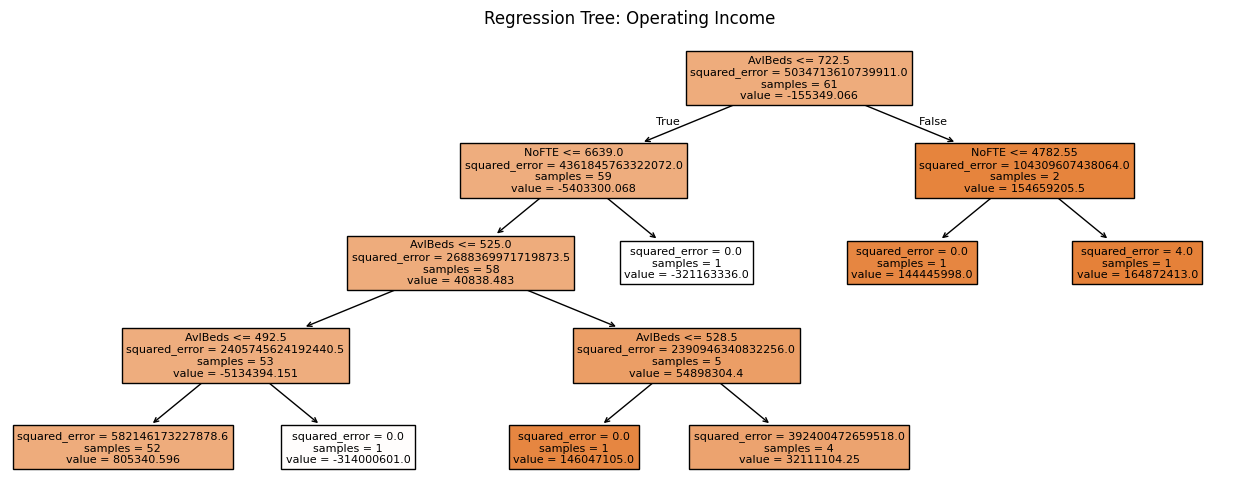

In [7]:
reg1 = DecisionTreeRegressor(max_depth=4, random_state=0)
reg1.fit(hospital_df[predictors_encoded], hospital_df['OperInc'])

plt.figure(figsize=(16, 6))
plot_tree(reg1, feature_names=predictors, filled=True)
plt.title("Regression Tree: Operating Income")
plt.show()

This tree splits first on AvlBeds, indicating that bed capacity is a strong predictor of operating income. NoFTE is also used in splits, suggesting that staffing impacts income as well. These splits are logical—larger and better-staffed hospitals typically generate more operating income.

# Regression Tree - Target: Operating Revenue

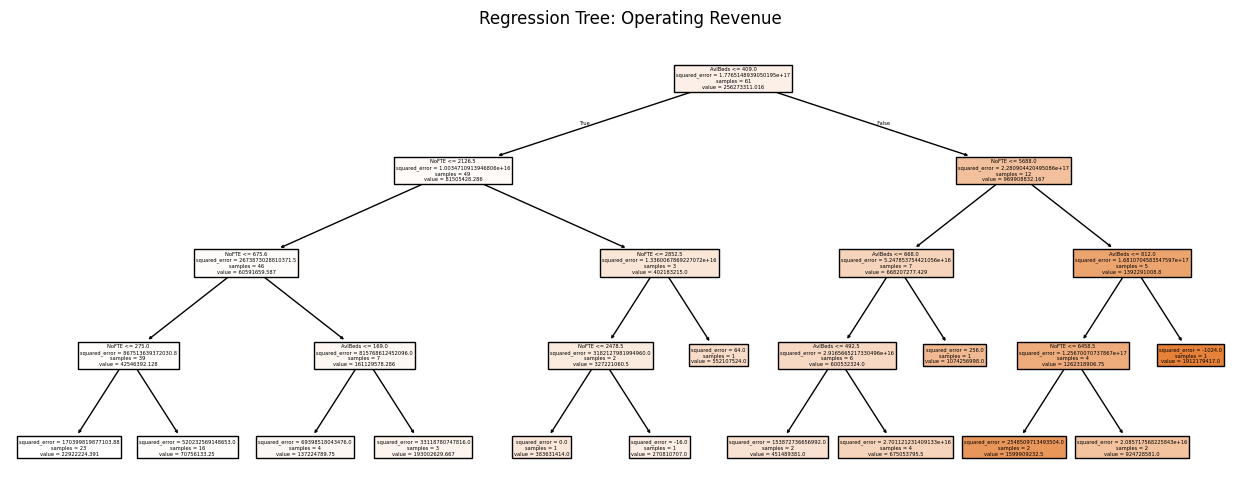

In [8]:
reg2 = DecisionTreeRegressor(max_depth=4, random_state=0)
reg2.fit(hospital_df[predictors_encoded], hospital_df['OperRev'])

plt.figure(figsize=(16, 6))
plot_tree(reg2, feature_names=predictors, filled=True)
plt.title("Regression Tree: Operating Revenue")
plt.show()

Again, AvlBeds is the primary split, followed by Teaching and NoFTE. Teaching hospitals and those with more beds generally produce more revenue, which aligns with expectations.

# Classification Tree - Target: TypeControl

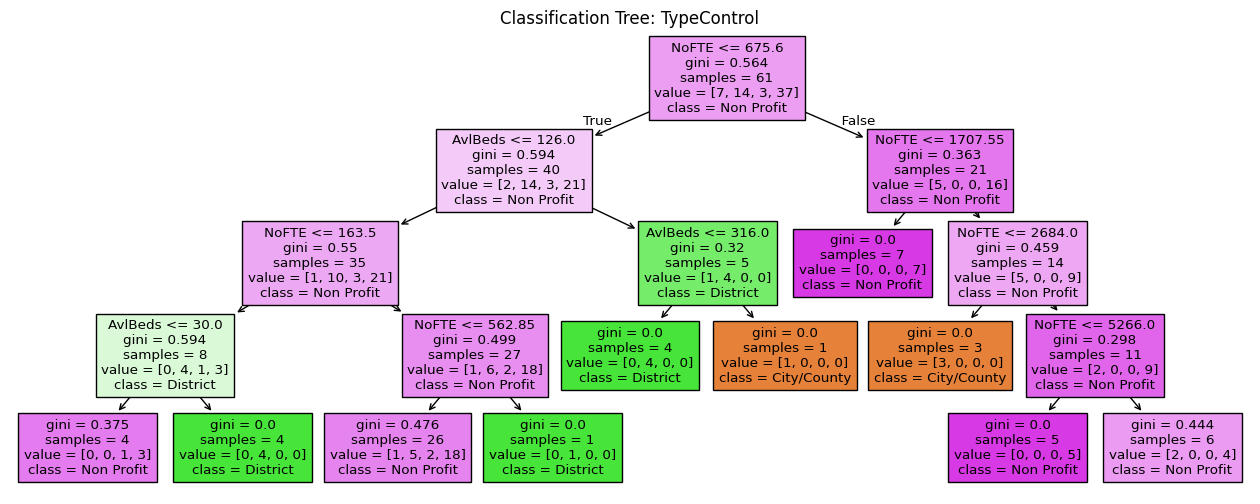

In [10]:
# Encode TypeControl separately
le_type = LabelEncoder()
hospital_df['TypeControl_encoded'] = le_type.fit_transform(hospital_df['TypeControl'])

# Classification Tree - Target: TypeControl
clf1 = DecisionTreeClassifier(max_depth=4, random_state=0)
clf1.fit(hospital_df[predictors_encoded], hospital_df['TypeControl_encoded'])

plt.figure(figsize=(16, 6))
plot_tree(clf1, feature_names=predictors, class_names=le_type.classes_, filled=True)
plt.title("Classification Tree: TypeControl")
plt.show()

The tree uses NoFTE and AvlBeds to distinguish between hospital types. Non Profit hospitals are separated fairly well, but City/County and District types are more scattered. This model captures some useful structure but is less clean than others.

# Classification Tree - Target: DonorType

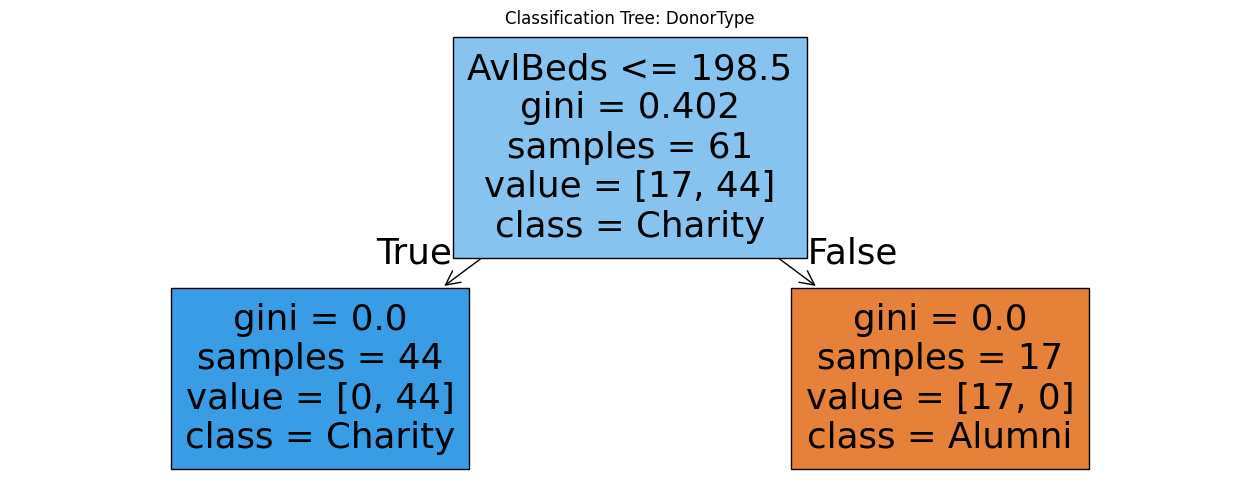

In [11]:
# Encode DonorType separately
le_donor = LabelEncoder()
hospital_df['DonorType_encoded'] = le_donor.fit_transform(hospital_df['DonorType'])

# Classification Tree - Target: DonorType
clf2 = DecisionTreeClassifier(max_depth=4, random_state=0)
clf2.fit(hospital_df[predictors_encoded], hospital_df['DonorType_encoded'])

plt.figure(figsize=(16, 6))
plot_tree(clf2, feature_names=predictors, class_names=le_donor.classes_, filled=True)
plt.title("Classification Tree: DonorType")
plt.show()

This tree shows a perfect split based on AvlBeds <= 198.5. Hospitals with fewer beds are classified as Charity, while those with more are Alumni. There is no impurity in the terminal nodes—an extremely clean and effective classification.

## Best Model

The Classification Tree for DonorType is the strongest model. It delivers a perfect split based on AvlBeds, with zero misclassifications in the sample. It's highly interpretable, compact, and reflects a strong, real-world relationship between hospital size and donor type.

## Refrences

https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

I used this website to help with my regression trees

https://www.datacamp.com/tutorial/decision-tree-classification-python

I used this website to help with my classification trees

https://www.youtube.com/watch?v=yi7KsXtaOCo

I used this video to get a refresher on interpreting the trees.